In [ ]:
# import necessary libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load cleaned datasets

matches = pd.read_csv("matches_cleaned.csv")
deliveries = pd.read_csv("deliveries_cleaned.csv")

In [ ]:
# display the shapes of the datasets

print(matches.shape)
print(deliveries.shape)

(1095, 20)
(260920, 17)


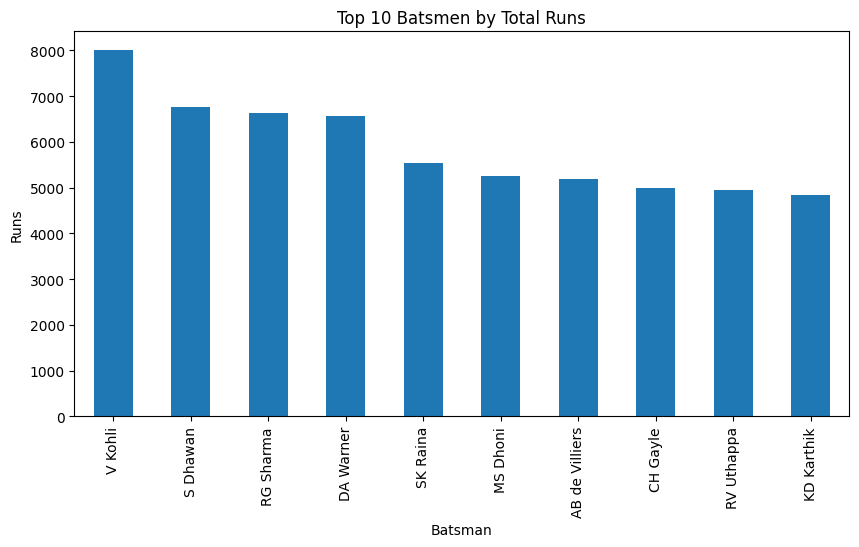

In [ ]:
# top 10 batsmens in all seasons
top_batsmen = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind="bar")
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.show()


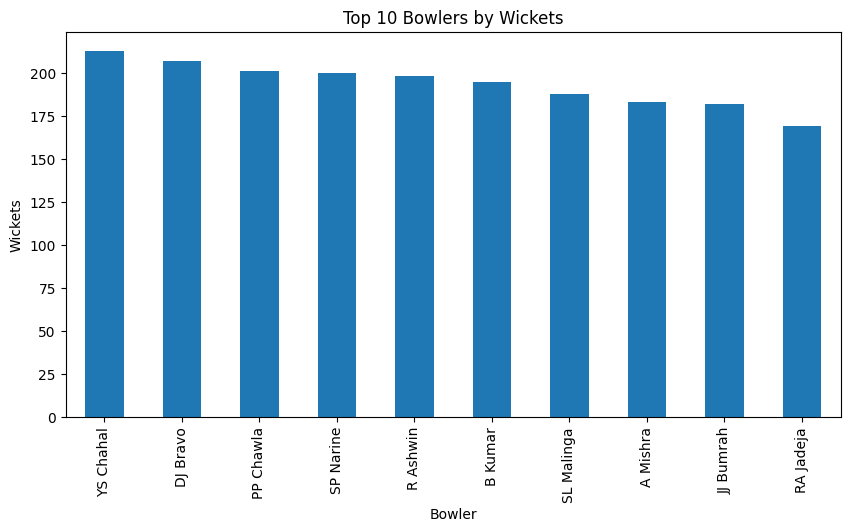

In [ ]:
# top 10 bowlers by wickets

wickets = deliveries[deliveries['player_dismissed'].notnull()]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_bowlers.plot(kind="bar")
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()


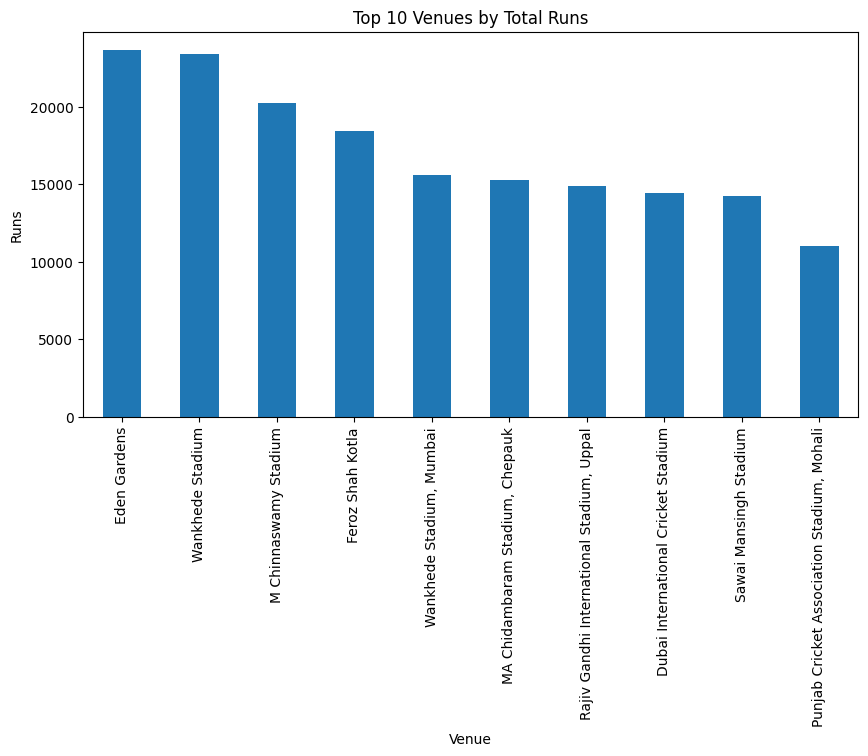

In [ ]:
# venues anlysis (highest scoring grounds)

venue_runs = deliveries.merge(matches[['id','venue']], left_on='match_id', right_on='id')
venue_total_runs = venue_runs.groupby('venue')['total_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
venue_total_runs.plot(kind='bar')
plt.title("Top 10 Venues by Total Runs")
plt.xlabel("Venue")
plt.ylabel("Runs")
plt.show()


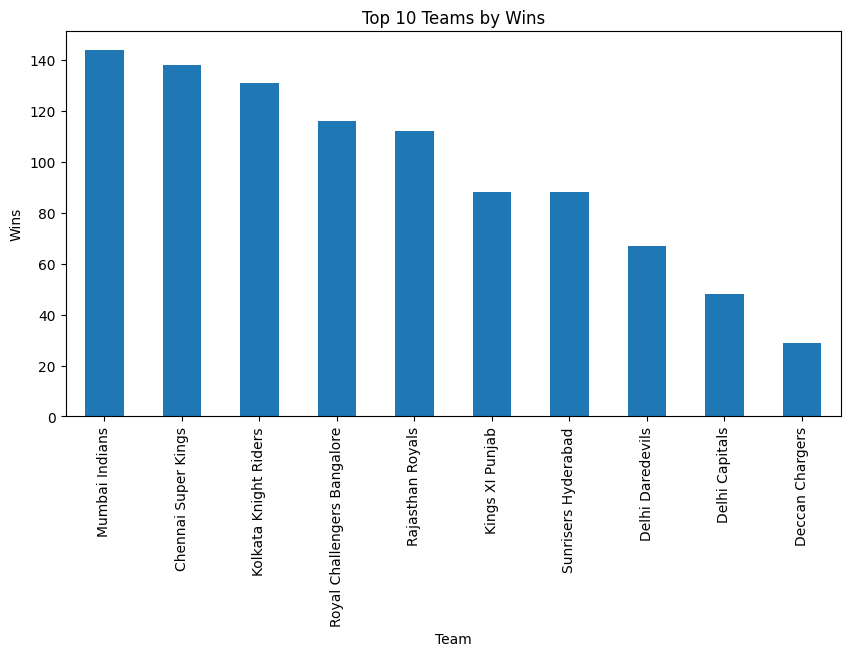

In [ ]:
#  most successful teams

top_teams = matches['winner'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_teams.plot(kind='bar')
plt.title("Top 10 Teams by Wins")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


In [ ]:
# toss impact on winning

toss_win = matches[matches['toss_winner'] == matches['winner']]

percentage = round(len(toss_win) / len(matches) * 100, 2)
print("Toss winner also won match:", percentage, "%")


Toss winner also won match: 50.59 %


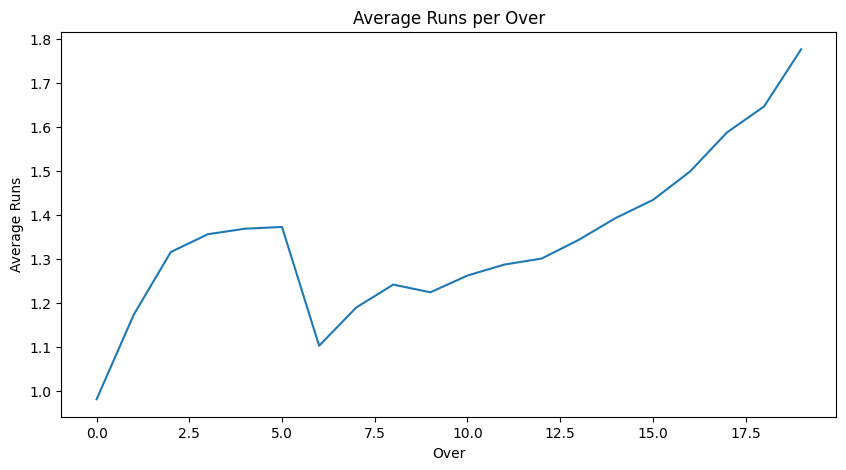

In [ ]:
# average runs per over

over_runs = deliveries.groupby("over")["total_runs"].mean()

plt.figure(figsize=(10,5))
over_runs.plot()
plt.title("Average Runs per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.show()
